In [97]:
import numpy as np 
import pandas as pd 

In [98]:
heart_data = pd.read_csv("./dataset/heart_failure_clinical_records_dataset.csv")
heart_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [99]:
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [100]:
# check for null values
heart_data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [101]:
# Separate features and target variable
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

x = heart_data[features]
y = heart_data["DEATH_EVENT"]

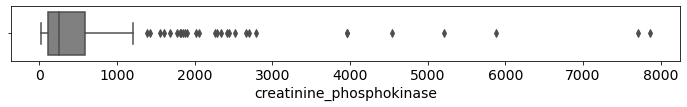

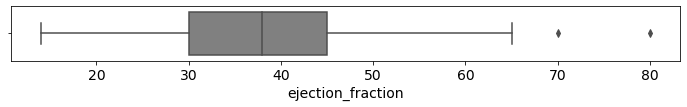

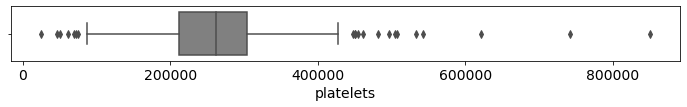

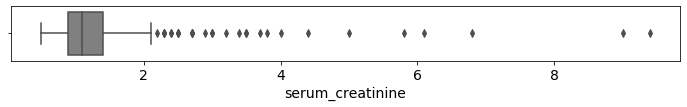

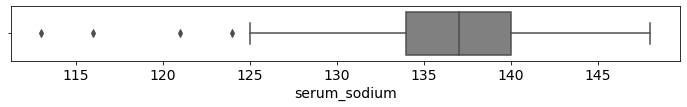

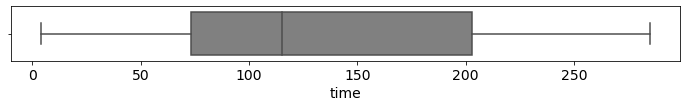

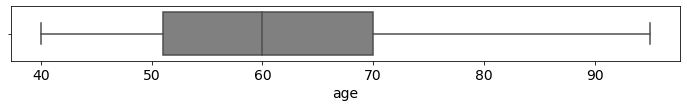

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = 12,1
plt.rcParams["font.size"] = 14

# Non boolean values
sns.boxplot(x=heart_data["creatinine_phosphokinase"], color="grey")
plt.show()
sns.boxplot(x=heart_data["ejection_fraction"], color="grey")
plt.show()
sns.boxplot(x=heart_data["platelets"], color="grey")
plt.show()
sns.boxplot(x=heart_data['serum_creatinine'], color = 'grey')
plt.show()
sns.boxplot(x=heart_data["serum_sodium"], color="grey")
plt.show()
sns.boxplot(x=heart_data["time"], color="grey")
plt.show()
sns.boxplot(x=heart_data["age"], color="grey")
plt.show()

# Boolean values: diabetes, sex, smoking, anaemia, high_blood_pressure

In [103]:
# Remove outliers
heart_data["ejection_fraction"] = heart_data[heart_data["ejection_fraction"] < 70]

In [104]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [105]:
# Normalize features
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler().fit(x_train)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

encoder = LabelEncoder().fit(y)

y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

## Logistic regresssion

In [106]:
# Storing the accuracy of all models
all_model_accuracy = {}

In [107]:
# Fit model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix

# Predict, calculate score
y_pred = model.predict(x_test)

conf_matrix = confusion_matrix(y_pred, y_test)
accuracy = model.score(x_test, y_test)

all_model_accuracy["LogisticRegression"] = accuracy

print(conf_matrix)
print(accuracy)

[[37 12]
 [ 0 11]]
0.8


## K nearest neighbors


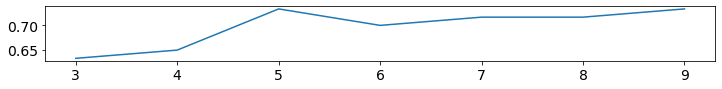

In [108]:
# KNN model

from sklearn.neighbors import KNeighborsClassifier

# For grid search
accuracy_results = []

neighbor_range = range(3, 10)
for num_neighbors in neighbor_range:
    clf = KNeighborsClassifier(n_neighbors=num_neighbors, metric = 'minkowski')
    clf.fit(x_train, y_train)
#     y_pred = clf.predict(x_test_scaled)
    accuracy_results.append(clf.score(x_test, y_test))
    
import matplotlib.pyplot as plt

plt.plot(list(neighbor_range), accuracy_results)
plt.show()

In [109]:
# Using num neighbors = 9

knn_model = KNeighborsClassifier(n_neighbors=9, metric="minkowski")
knn_model.fit(x_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = knn_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
all_model_accuracy["KNN"] = accuracy
print(accuracy)

[[37  0]
 [16  7]]
0.7333333333333333


## Decision Tree

In [110]:
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier(random_state=0, criterion="entropy")

dtree_model.fit(x_train, y_train)

y_predict = dtree_model.predict(x_test)

conf_matrix = confusion_matrix(y_pred, y_test)
accuracy = dtree_model.score(x_test, y_test)

all_model_accuracy["DecisionTree"] = accuracy

print(conf_matrix)
print(accuracy)

[[37 16]
 [ 0  7]]
0.8166666666666667


## Random forest

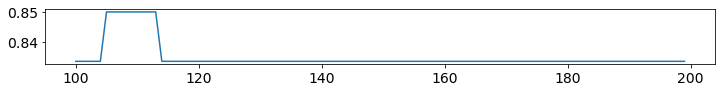

In [111]:
from sklearn.ensemble import RandomForestClassifier

accuracy_results = []
num_trees = range(100, 200)

for num_tree in num_trees:
    rf_model = RandomForestClassifier(random_state=0, n_estimators=num_tree, criterion='entropy')
    rf_model.fit(x_train, y_train)
    
    accuracy_results.append(rf_model.score(x_test, y_test))
    
import matplotlib.pyplot as plt

plt.plot(list(num_trees), accuracy_results)
plt.show()

In [112]:
# Using 110 trees
rf_model = RandomForestClassifier(n_estimators=110, random_state=0, criterion='entropy')
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

all_model_accuracy["RandomForest"] = accuracy
print(confusion_matrix(y_test, y_pred))
print(accuracy)

[[36  1]
 [ 8 15]]
0.85


## Neural network

In [113]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

ann_model = keras.Sequential()

# Add 4 layers
ann_model.add(layers.Dense(units=10, activation='relu'))
ann_model.add(layers.Dense(units=10, activation='relu'))
ann_model.add(layers.Dense(units=10, activation='relu'))
ann_model.add(layers.Dense(units=10, activation='relu'))

# Add output layer
ann_model.add(layers.Dense(units=1, activation='sigmoid'))

# Build
ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )

# Train
ann_model.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7683 - accuracy: 0.3054
Epoch 2/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7401 - accuracy: 0.3054
Epoch 3/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7208 - accuracy: 0.3054
Epoch 4/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7078 - accuracy: 0.3222
Epoch 5/100
8/8 [==============================] - 0s 867us/step - loss: 0.6961 - accuracy: 0.4184
Epoch 6/100
8/8 [==============================] - 0s 748us/step - loss: 0.6885 - accuracy: 0.5188
Epoch 7/100
8/8 [==============================] - 0s 995us/step - loss: 0.6815 - accuracy: 0.5649
Epoch 8/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6753 - accuracy: 0.6402
Epoch 9/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6692 - accuracy: 0.7197
Epoch 10/100
8/8 [==============================] - 0s 997us/step - loss: 0.6630 - accuracy: 0.7573
Epoch 11/100
8/8 [===

In [114]:
# Summary of model
ann_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________


In [115]:
# Predicting
y_predict = ann_model.predict(x_test)
y_predict = (y_predict > 0.5) # Convert to boolean
# y_predict

In [116]:
accuracy = accuracy_score(y_test, y_predict)

all_model_accuracy["NeuralNetwork"] = accuracy

print(confusion_matrix(y_predict, y_test))
print(accuracy_score(y_predict, y_test))

[[33  9]
 [ 4 14]]
0.7833333333333333


## XGBoost Classifier

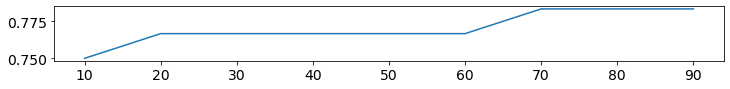

In [117]:
from xgboost import XGBClassifier

accuracy_results = []
num_estimators = range(10, 100, 10)

for num_estimator in num_estimators:
    model = XGBClassifier(n_estimators=num_estimator)
    model.fit(x_train, y_train)
    
    accuracy_results.append(model.score(x_test, y_test))
    
import matplotlib.pyplot as plt

plt.plot(list(num_estimators), accuracy_results)
plt.show()

In [118]:
model = XGBClassifier(n_estimators=80)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)

all_model_accuracy["XGBoost"] = accuracy

print(confusion_matrix(y_pred, y_test))
print(accuracy)

[[34 10]
 [ 3 13]]
0.7833333333333333


In [119]:
all_model_accuracy

{'LogisticRegression': 0.8,
 'KNN': 0.7333333333333333,
 'DecisionTree': 0.8166666666666667,
 'RandomForest': 0.85,
 'NeuralNetwork': 0.7833333333333333,
 'XGBoost': 0.7833333333333333}

## Plotting all accuracy results

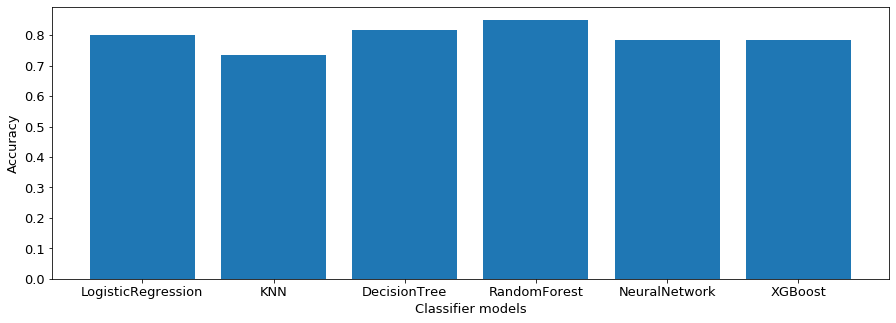

In [120]:
import matplotlib.pylab as plt

font = {'family' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

plt.figure(figsize=(15, 5))

ticks = range(1,7)
tick_label = list(all_model_accuracy.keys())
height = list(all_model_accuracy.values())

plt.bar(ticks, height, tick_label=tick_label)
plt.ylabel("Accuracy")
plt.xlabel("Classifier models")
plt.show()